## Observations and Insights 

Looking at this data we can come up with a few conclusions or observations:
    1. The weight of the  mouse seems to correlate with the size of the tumor. The more the mice weighed the bigger the tumor volume was as shown in the regression table.
    2. Using four of the regimens we calculated how the drug affected the mice and looking at teh box plot we can come the conclusion that the treatments are predictable and we can predict a range of volume size for each mouse.
    3. The Capomulin drug performed as well if not better than the rest of the drugs tested but one stood out as close if not better than Capomulin that drug is Ramicane.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#checking what columns I have to work with 
ColumnnamesMM = mouse_metadata 
ColumnnamesSR = study_results
ColumnnamesSR.columns , ColumnnamesMM.columns

(Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object'),
 Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object'))

In [2]:
#testing merge 

#merge_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")
#merge_df.head(5)

In [3]:
# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
merge_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
len(merge_df["Mouse ID"])

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#variable that will hold the mouse id's and timepoints
mouse_experiments = (merge_df[["Mouse ID","Timepoint"]])

#checks how many ID's are duplicated.
#mouse_experiments.duplicated().sum()

#displays what ID's are duplicated.
#mouse_experiments.loc[mouse_experiments.duplicated(),:]

#displays all the instances of ID number "g989"
experiment_g989_dupes = mouse_experiments[mouse_experiments["Mouse ID"] == "g989"]
experiment_g989_dupes

,Mouse ID,Timepoint
107,g989,0
137,g989,0
329,g989,5
360,g989,5
620,g989,10
681,g989,10
815,g989,15
869,g989,15
950,g989,20
1111,g989,20


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
experiment_g989_dupes = merge_df[merge_df["Mouse ID"] == "g989"]
experiment_g989_dupes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
#testing the drop function to drop the duplicates 
#clean_df = merge_df.drop_duplicates()
#len(clean_df)

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#new variable that will have the cleaned up data 
clean_df = merge_df.drop_duplicates()

#display the count of both data to make sure the duplicate ha sbeen deleted
#len(merge_df),len(clean_df)

#test new Dataframe
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"])

1892

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#mean
regimen_type_mean = clean_df.groupby("Drug Regimen").mean()
regimen_type_mean = regimen_type_mean.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Means"})
regimen_mean_volume = regimen_type_mean["Tumor Volume Means"]
#median
regimen_type_median = clean_df.groupby("Drug Regimen").median()
regimen_type_median = regimen_type_median.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Median"})
regimen_median_volume = regimen_type_median["Tumor Volume Median"]
#variance
regimen_type_variance = clean_df.groupby("Drug Regimen").var()
regimen_type_variance = regimen_type_variance.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})
regimen_var_volume = regimen_type_variance["Tumor Volume Variance"]
#Standard deviation
regimen_type_std = clean_df.groupby("Drug Regimen").std()
regimen_type_std = regimen_type_std.rename(columns={"Tumor Volume (mm3)":"Tumor Volume STD"})
regimen_STD_volume = regimen_type_std["Tumor Volume STD"]
#SEM
regimen_type_sem = clean_df.groupby("Drug Regimen").sem()
regimen_type_sem = regimen_type_sem.rename(columns={"Tumor Volume (mm3)":"Tumor Volume SEM"})
regimen_SEM_volume = regimen_type_sem["Tumor Volume SEM"]

In [11]:
# Assemble the resulting series into a single summary dataframe.
combine1 = pd.merge(regimen_type_mean, regimen_mean_volume, on = "Drug Regimen")
del combine1["Timepoint"]
del combine1["Metastatic Sites"]
del combine1["Age_months"]
del combine1["Weight (g)"]
del combine1["Tumor Volume Means_y"]
combine1 = combine1.rename(columns={"Tumor Volume Means_x":"Tumor Volume Means"})
combine2 = pd.merge(combine1, regimen_median_volume, on = "Drug Regimen")
combine3 = pd.merge(combine2, regimen_var_volume, on = "Drug Regimen")
combine4 = pd.merge(combine3, regimen_STD_volume, on = "Drug Regimen")
combine5 = pd.merge(combine4, regimen_SEM_volume, on = "Drug Regimen")
combine5

,Tumor Volume Means,Tumor Volume Median,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])
agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# formatting the aggrated table
agg = agg.rename(columns={
    "mean" : "Volume Mean" ,
    "median" : "Volume Median",
    "var" : "Volume Variance",
    "std":"Standard deviation",
    "sem":"Volume SEM"
})
agg

,Volume Mean,Volume Median,Volume Variance,Standard deviation,Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [14]:
#filter what columns i want to use 
Timepoint_Drug = clean_df[["Drug Regimen","Timepoint"]]

#get the sum of the timepoints for each all mice per regimen
Timepoint_Drug = Timepoint_Drug.groupby("Drug Regimen").sum()

Timepoint_Drug

,Timepoint
Drug Regimen,
Capomulin,4960
Ceftamin,3515
Infubinol,3235
Ketapril,3705
Naftisol,3650
Placebo,3380
Propriva,2715
Ramicane,4885
Stelasyn,3480


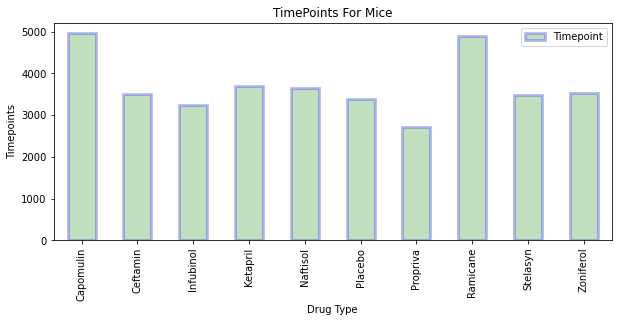

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Timepoint_Drug.plot(kind = "bar", color = "g", alpha = 0.25, figsize=(10,4), edgecolor = "b", linewidth = 3)


#label my axis's
plt.xlabel('Drug Type')
plt.ylabel('Timepoints')

#put a title
plt.title("TimePoints For Mice")
plt.show()
plt.tight_layout()

In [16]:
#filter columns
timepointanddrug = clean_df[["Drug Regimen","Timepoint"]]

#get the sum of the timepoints for each all mice per regimen
timepointperregimen = timepointanddrug.groupby("Drug Regimen").sum()
timepointperregimen

,Timepoint
Drug Regimen,
Capomulin,4960
Ceftamin,3515
Infubinol,3235
Ketapril,3705
Naftisol,3650
Placebo,3380
Propriva,2715
Ramicane,4885
Stelasyn,3480


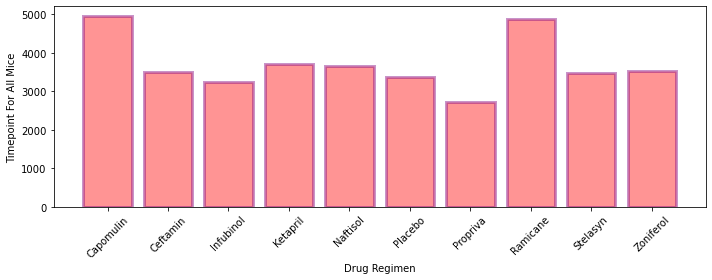

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#get my x axis and tick locations
x_axis = np.arange(len(timepointperregimen))
tick_locations = [value for value in x_axis]

#formatting my table with the information required and creative editing 
plt.figure(figsize=(10,4))
plt.bar(x_axis, timepointperregimen["Timepoint"],facecolor = "r", alpha = 0.42, align = "center", edgecolor = "purple", linewidth = 3)
plt.xticks(tick_locations, timepointperregimen.index, rotation = 45)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint For All Mice")
plt.tight_layout()

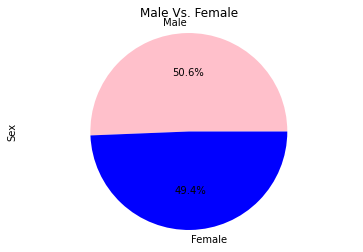

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#male pink female blue
Sex = clean_df["Sex"].value_counts()
colors = ["Pink","Blue"]
Sex.plot(kind = "pie", y = "Mouse ID", title = "Male Vs. Female", autopct="%1.1f%%", colors = colors)

plt.axis("equal")
plt.show()

In [20]:
#checking my genders variable
Sex

Male      958
Female    934
Name: Sex, dtype: int64

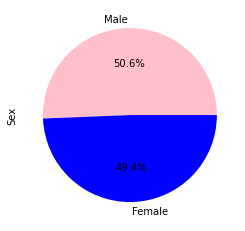

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#colors for my pie chart 
#male pink female blue
colors = ["Pink","Blue"]

#create pie chart
plt.pie(Sex.values , labels = Sex.index.values, autopct = "%1.1f%%", colors = colors)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttimepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
lasttimepoint = lasttimepoint.reset_index()
#lasttimepoint.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timemergeclean_df = lasttimepoint.merge(clean_df, on =["Mouse ID","Timepoint"], how = "left")
timemergeclean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [23]:
timemergeclean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [24]:
print(timemergeclean_df["Drug Regimen"].unique())

['Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn' 'Zoniferol' 'Ramicane'
 'Ketapril' 'Propriva' 'Naftisol' 'Capomulin']


In [30]:
# Put treatments into a list for loop (and later for plot labels)
#Capomulin, Ramicane, Infubinol, and Ceftamin
drugregimens = ['Capomulin', 'Ceftamin', 'Infubinol','Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in drugregimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorcount = timemergeclean_df.loc[timemergeclean_df["Drug Regimen"]== i, "Tumor Volume (mm3)"]
    
    # add subset 
    tumorvol.append(tumorcount)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorcount.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    outliers = tumorcount.loc[(tumorcount < lowerbound) | (tumorcount > upperbound)]
    print(f"{i}'s potential outliers: \n{outliers}\n")

Capomulin's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ramicane's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)



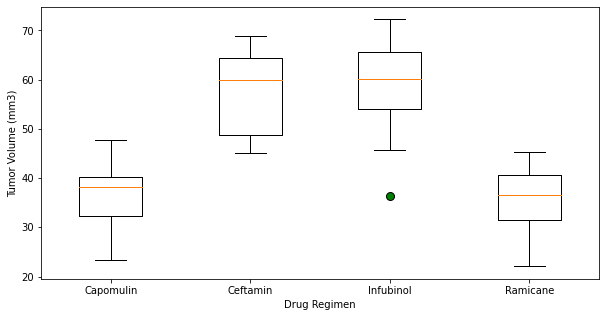

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#resize figure so the xticks can fit and not overlap 
plt.figure(figsize=(10,5))

#generate a color for my graph point
green_out = dict(markerfacecolor = "green", markersize = 8)

#create the boxplot
plt.boxplot(tumorvol, labels=drugregimens, flierprops=green_out)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [28]:
#variable for Capomulin data
capomulindata_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
capomulindata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


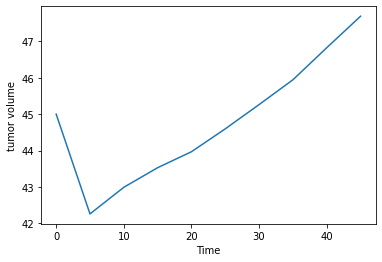

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#choose the mouse i will use 
mousedata = capomulindata_df.loc[capomulindata_df["Mouse ID"]=="i557"]

#create the graph for thats mouse's data
plt.plot(mousedata["Timepoint"], mousedata["Tumor Volume (mm3)"])
plt.xlabel("Time")
plt.ylabel("tumor volume")
plt.show()

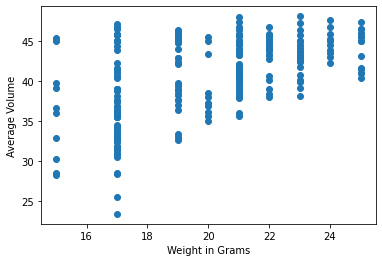

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulinavgtumor = capomulindata_df.groupby("Mouse ID").mean()

#create the scatter plot
plt.scatter(capomulindata_df["Weight (g)"], capomulindata_df["Tumor Volume (mm3)"])
plt.xlabel("Weight in Grams")
plt.ylabel("Average Volume")
#check the table for correct grouping
#capomulinavgtumor.head()
plt.show()

## Correlation and Regression

LinregressResult(slope=0.9609669432428365, intercept=21.48982721329955, rvalue=0.5256995552077172, pvalue=9.605446629501037e-18, stderr=0.10298279892023661, intercept_stderr=2.075157005491299)


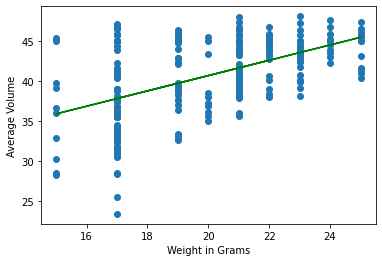

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capomulindata_df["Weight (g)"], capomulindata_df["Tumor Volume (mm3)"])[0],2)

#get the slope and intercepts values i need
model = st.linregress(capomulindata_df["Weight (g)"], capomulindata_df["Tumor Volume (mm3)"])
print(model)

#create the line for my graph
yvalues = capomulindata_df["Weight (g)"] * model[0] + model[1]

#plot the data 
plt.scatter(capomulindata_df["Weight (g)"], capomulindata_df["Tumor Volume (mm3)"])
plt.xlabel("Weight in Grams")
plt.ylabel("Average Volume")


#generate the line in my graph
plt.plot(capomulindata_df["Weight (g)"], yvalues, color="g")
plt.show()